<a href="https://colab.research.google.com/github/rifadukrifat-0035/Test-class/blob/main/%5BMod_6%5D_Project_03_Clustering_Assignment_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step-01 :Setup part & Import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix, adjusted_rand_score


# **Step 2: Load Dataset**

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


Head


In [4]:
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Info


In [5]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


Describe

In [6]:
print(X.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


missing values

In [7]:
print(X.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


# **Step-03: Scale Features**

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
print(X_scaled)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

# **Step 4: EDA (Exploratory Data Analysis)**

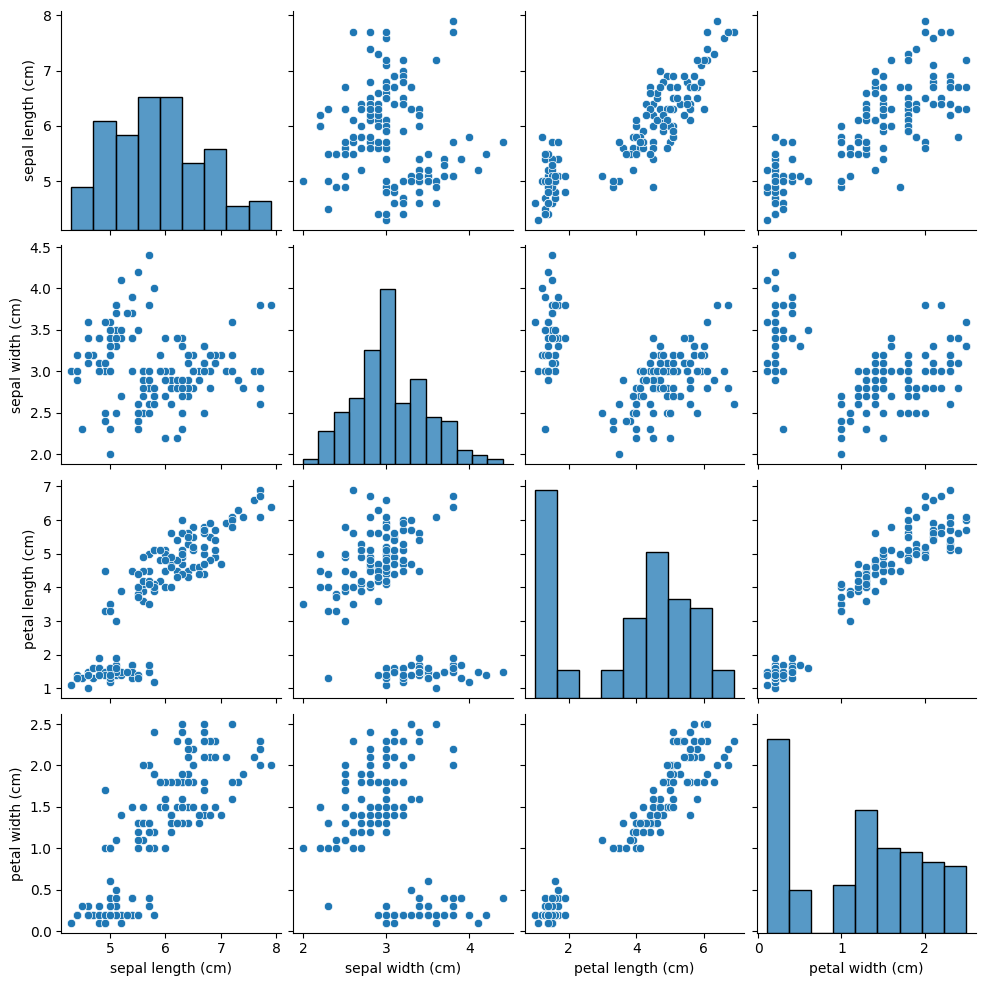

In [13]:
sns.pairplot(pd.DataFrame(X, columns=iris.feature_names))
plt.show()



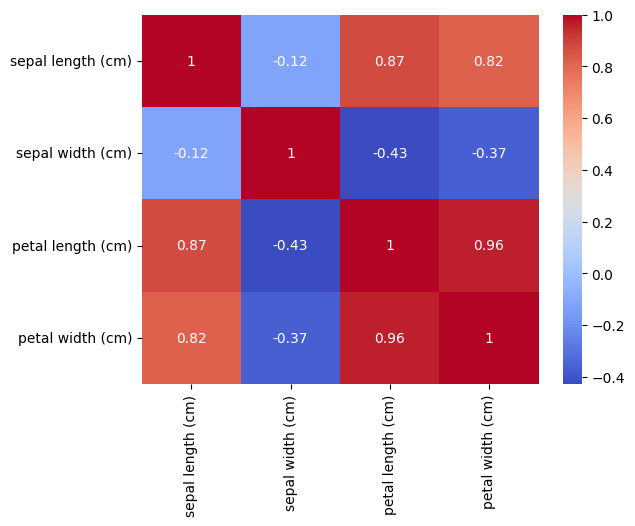

In [12]:
sns.heatmap(pd.DataFrame(X, columns=iris.feature_names).corr(), annot=True, cmap="coolwarm")
plt.show()

# **Step -05: K-Means Clustering**

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i , random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)



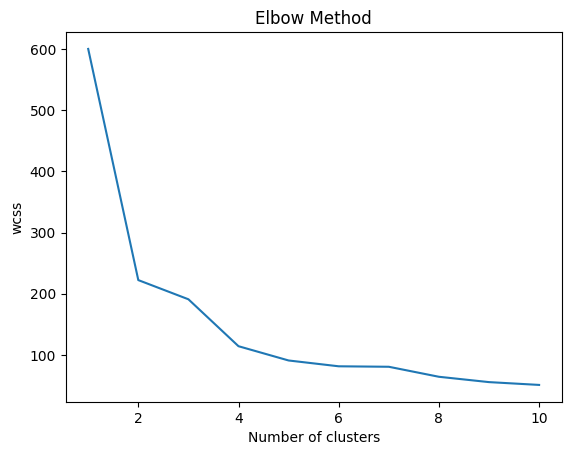

In [20]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Fit K-Means (say k=3)

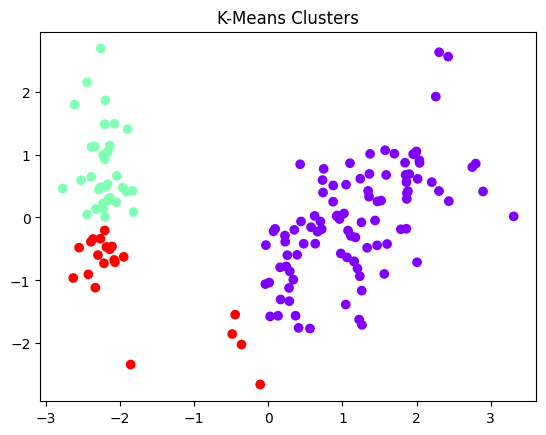

In [60]:
kmeans = KMeans(n_clusters=3, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)

pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=k_labels, cmap='rainbow')
plt.title("K-Means Clusters")
plt.show()


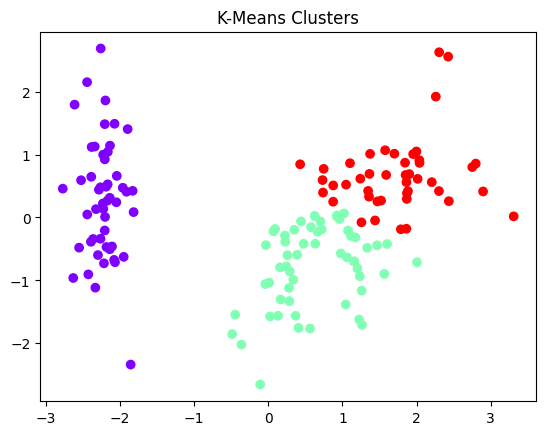

In [57]:
kmeans = KMeans(n_clusters=3, random_state=47)
k_labels = kmeans.fit_predict(X_scaled)

pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=k_labels, cmap='rainbow')
plt.title("K-Means Clusters")
plt.show()


# **Step -06: Hierarchical Clustering**

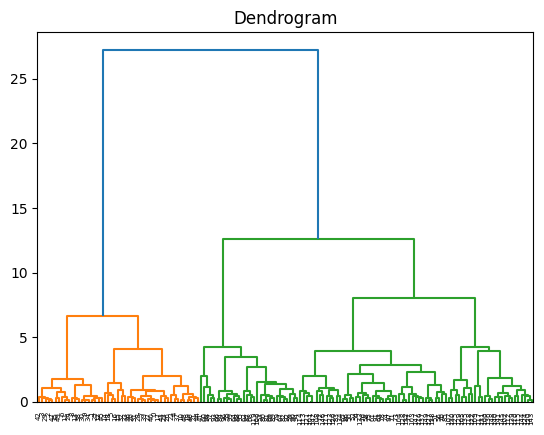

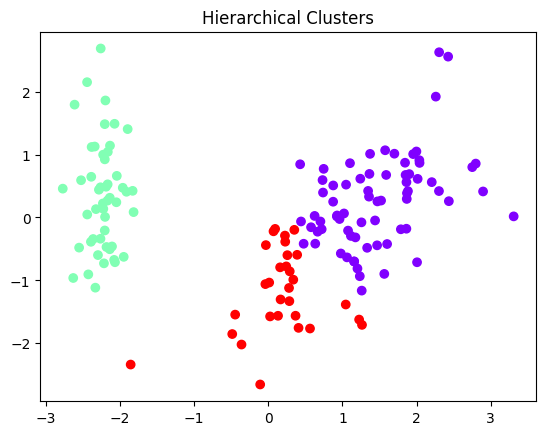

In [64]:
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title("Dendrogram")
plt.show()

agg = AgglomerativeClustering(n_clusters=3)
h_labels = agg.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=h_labels, cmap='rainbow')
plt.title("Hierarchical Clusters")
plt.show()


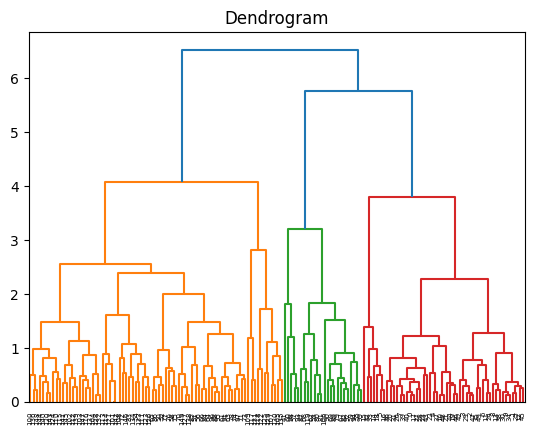

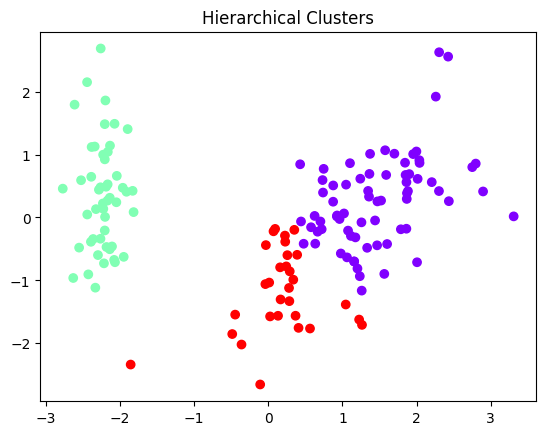

In [65]:
linked = linkage(X_scaled, method='complete')
dendrogram(linked)
plt.title("Dendrogram")
plt.show()

agg = AgglomerativeClustering(n_clusters=3)
h_labels = agg.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=h_labels, cmap='rainbow')
plt.title("Hierarchical Clusters")
plt.show()


# **Step -07: DBSCAN**

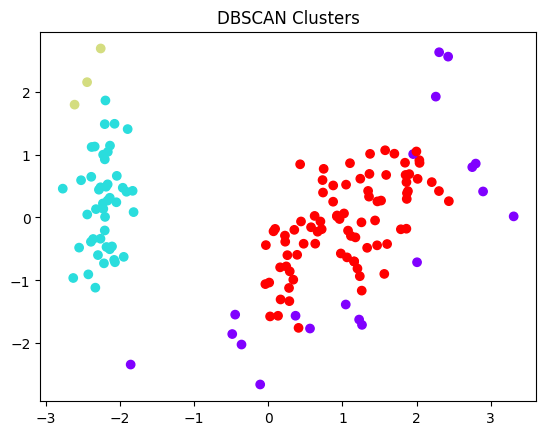

In [52]:
db = DBSCAN(eps=0.6, min_samples=4)
db_labels = db.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='rainbow')
plt.title("DBSCAN Clusters")
plt.show()


# **Step -08: Evaluation**

In [63]:
print("KMeans ARI:", adjusted_rand_score(y, k_labels))
print("Hierarchical ARI:", adjusted_rand_score(y, h_labels))
print("DBSCAN ARI:", adjusted_rand_score(y, db_labels))


KMeans ARI: 0.432804702527474
Hierarchical ARI: 0.6153229932145449
DBSCAN ARI: 0.48541172995292864
